In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

# para evitarmos a exibição dos dados em notacao científica
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from numpy import mean
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.under_sampling import InstanceHardnessThreshold
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

In [4]:
#Reload dataset cleaned
dataset = pd.read_csv("leukemia247.csv", index_col=0)
df = pd.DataFrame(dataset)
df.shape

(1332, 250)

In [5]:
df.head()

,Status,Leukemia,Age_group,PQLC2,COL9A2,AKR7A2,PTPRU,IL12RB2,BMP8B,STMN1,...,PBX3,GAS1,TDRD7,TKTL1,NXT2,FAM127A,CCNB3,RAB39B,KCNE1L,SAGE1
patient,,,,,,,,,,,,,,,,,,,,,
TARGET-20-PABHET,KMT2A-WT,AML,pediatric,11.026,23.265,6.362,0.169,0.627,2.334,123.779,...,6.632,0.072,18.485,0.762,16.824,8.576,0.044,3.244,7.811,0.000
TARGET-20-PABHKY,KMT2A-WT,AML,pediatric,7.953,47.429,17.014,0.236,1.153,2.059,66.008,...,7.300,0.079,17.879,1.607,10.848,5.108,0.186,2.101,24.633,0.000
TARGET-20-PABLDZ,KMT2A-WT,AML,pediatric,8.799,6.630,44.009,0.077,0.029,0.246,187.226,...,11.419,0.140,6.316,0.055,70.217,7.595,0.092,0.481,0.143,12.506
TARGET-20-PACDZR,KMT2A-WT,AML,pediatric,9.322,15.780,27.391,0.100,0.256,1.246,186.547,...,3.193,3.208,6.189,0.617,9.230,0.467,0.026,1.522,0.138,0.000
TARGET-20-PADDXZ,KMT2A-WT,AML,pediatric,6.879,30.013,16.351,0.169,0.024,1.062,91.189,...,12.377,0.008,7.966,0.990,4.378,0.264,0.082,0.538,2.031,0.000


In [6]:
df = df[['Status','Leukemia', 'Age_group', 'SKIDA1', "LAMP5", "HOXA9", "SOCS2", "CLEC2B", "PPP1R27", "CPA6", "NEDD4", "SERINC2", "SLC35G1", "TRPM4", "MEIS1", "FEZ1", "MYO5C", "ZNF254", "GOLGA8I", "MYO6", "VAT1L", "HTR1F", "MEF2C"]]

In [7]:
# Remove the column Age_group
df = df.drop(['Age_group'],axis = 1)
# create new variables with the dummies function with the categorical variable leukemia
# (e.g: 'Leukemia_ALAL', 'Leukemia_AML', 'Leukemia_B-ALL', 'Leukemia_T-ALL')
df = pd.get_dummies(df, columns=['Leukemia'], dtype=int)

In [8]:
df.head()

,Status,SKIDA1,LAMP5,HOXA9,SOCS2,CLEC2B,PPP1R27,CPA6,NEDD4,SERINC2,...,ZNF254,GOLGA8I,MYO6,VAT1L,HTR1F,MEF2C,Leukemia_ALAL,Leukemia_AML,Leukemia_B-ALL,Leukemia_T-ALL
patient,,,,,,,,,,,,,,,,,,,,,
TARGET-20-PABHET,KMT2A-WT,0.132,0.000,0.000,8.920,142.617,0.278,0.000,3.183,2.358,...,22.152,0.055,0.371,0.027,0.000,38.624,0,1,0,0
TARGET-20-PABHKY,KMT2A-WT,0.124,0.018,0.083,31.043,151.369,6.228,0.308,4.951,3.116,...,11.227,0.124,0.421,0.004,0.061,14.304,0,1,0,0
TARGET-20-PABLDZ,KMT2A-WT,0.352,1.370,2.078,15.806,81.379,13.544,0.563,5.012,5.157,...,6.223,0.000,0.007,0.295,0.036,35.078,0,1,0,0
TARGET-20-PACDZR,KMT2A-WT,0.140,123.938,0.027,1.843,34.584,0.193,0.424,3.733,4.601,...,13.653,0.276,0.038,0.000,1.905,4.194,0,1,0,0
TARGET-20-PADDXZ,KMT2A-WT,0.104,0.123,0.000,39.407,192.813,7.322,0.426,1.523,0.672,...,9.741,0.072,0.031,0.000,0.000,3.831,0,1,0,0


In [9]:
def joinCategories(row):
    if row['Status']== 'KMT2A-r'  :
        val = 1
    else:
        val = 0
    return val

df['Status'] = df.apply(joinCategories, axis=1)

print(df.shape)

X=df.drop(['Status'],axis = 1)
y=df[['Status']] 

print(df.Status.value_counts())

(1332, 25)
0    1232
1     100
Name: Status, dtype: int64


### Pre-process 

same seed=42

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=42)

from sklearn.preprocessing import StandardScaler
pd.options.mode.chained_assignment = None

# Normalize the data excluding the categorical variables
continuas_cols = X.iloc[:, ~X.columns.isin(['Leukemia_ALAL', 'Leukemia_AML', 'Leukemia_B-ALL',
       'Leukemia_T-ALL'])]
categoricas_cols = X.iloc[:, X.columns.isin(['Leukemia_ALAL', 'Leukemia_AML', 'Leukemia_B-ALL',
       'Leukemia_T-ALL'])]


sc = StandardScaler()
X_train[continuas_cols.columns] = sc.fit_transform(X_train[continuas_cols.columns])
X_test[continuas_cols.columns] = sc.transform(X_test[continuas_cols.columns]) # padronização dos dados de teste

In [11]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN
np.random.seed(42)
resample = SMOTEENN()
# define pipeline
pipeline = Pipeline(steps=[('r', resample)])
X_trains, y_trains = pipeline.fit_resample(X_train, y_train)

In [12]:
np.random.seed(42)

In [13]:
import lightgbm as lgb
import pickle


#BEST MODEL

#load model
grid = open('gbm.pkl', 'rb')
gbm = pickle.load(grid)
grid.close()
gbm

LGBMClassifier(learning_rate=0.05, num_leaves=12, random_state=42)

In [14]:
gbm = gbm.fit(X_trains,y_trains.values.ravel())

In [15]:
from sklearn.metrics import roc_auc_score
y_pred_gbm = gbm.fit(X_trains,y_trains.values.ravel()).predict(X_test)
roc_auc_score(y_test, y_pred_gbm)

0.9391883402437492

In [16]:
from sklearn.metrics import classification_report
cr_gbm = classification_report(y_test, y_pred_gbm)
print(cr_gbm)

prob_pos = gbm.predict_proba(X_test)
prob_pos = prob_pos[:,1]
print("\tROC(AUC) %1.3f" % roc_auc_score(y_test, prob_pos))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       379
           1       0.66      0.90      0.76        21

    accuracy                           0.97       400
   macro avg       0.82      0.94      0.87       400
weighted avg       0.98      0.97      0.97       400

	ROC(AUC) 0.984


In [21]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):

    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])

     # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        acuracia  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            sensibilidade = cf[1,1]/sum(cf[1,:])
            especificidade = cf[0,0]/sum(cf[0,:])
            VPP = cf[1,1] / sum(cf[:,1])
            VPN = cf[0,0] / sum(cf[:,0])
            
            # f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nSensitivity={:0.3f}\nEspecificity={:0.3f}\nPPV={:0.3f}\nNPV={:0.3f}".format(
                acuracia, sensibilidade, especificidade, VPP, VPN)
        else:
            stats_text = "\n\nnAcurácia={:0.3f}".format(acuracia)
    else:
        stats_text = ""

    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False

    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('Diagnosis obtained');
        plt.xlabel('Diagnosis predicted by the model' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

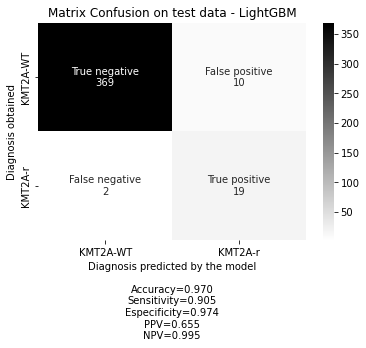

In [22]:
predictions = gbm.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels = [0, 1])
labels = ['True negative','False positive','False negative', 'True positive']
diagnosticos = ['KMT2A-WT', 'KMT2A-r']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=diagnosticos, 
                       percent=False,
                          cbar=True, cmap="binary", title="Matrix Confusion on test data - LightGBM")
#plt.savefig("cm_gbm.svg", format="svg", dpi=199, bbox_inches="tight")

In [ ]:
#get index of false positives

preds = {'Obs': ytcga.Status, 'Pred': predictions}
pd.set_option('display.max_rows', 215)
preds = pd.DataFrame(preds)
def joinCategories(row):
    if row['Obs']== 0 and row['Pred']== 1  :
        val = 'False'
    else:
        val = 'True'
    return val
preds['final'] = preds.apply(joinCategories, axis=1)
newdf = preds[(preds.final == "False")]
print("False positive")
newdf.index

##### To validate the best final model (lightGBM top 20 genes) it is important that the data go through the same preprocessing

# Validação TCGA

In [23]:
dataset = pd.read_csv("~/biomarcprogml_ov/results/Leukemia/version2022/TCGA_leuk.csv", index_col=0)
tcga = pd.DataFrame(dataset)
tcga.shape

(151, 254)

In [24]:
tcga.head()

,Age_group,Leukemia,ETV1,PROM1,TKTL1,SLC6A13,CD4,PRKCH,PQLC2,COL9A2,...,HOXA10,CLDN23,CCL23,DACH1,GOLGA8I,Status,Age_group_pediatric,Leukemia_ALAL,Leukemia_B-ALL,Leukemia_T-ALL
TCGA-AB-2823,older.adult,AML,0.000,0.011,0.030,0.026,16.508,0.736,6.273,1.162,...,0.052,0.038,0.000,1.630,0.245,KMT2A-WT,0,0,0,0
TCGA-AB-2853,adult,AML,0.009,3.481,0.158,0.026,8.986,4.924,4.802,7.210,...,17.093,0.088,4.527,0.788,0.738,KMT2A-WT,0,0,0,0
TCGA-AB-2882,older.adult,AML,0.080,10.899,0.194,0.087,38.065,9.269,8.393,3.022,...,1.161,0.209,0.806,0.405,0.414,KMT2A-WT,0,0,0,0
TCGA-AB-2875,adult,AML,0.019,32.955,0.419,0.036,12.024,5.339,3.873,6.324,...,0.008,0.508,0.373,1.368,0.860,KMT2A-WT,0,0,0,0
TCGA-AB-2942,older.adult,AML,0.011,19.929,0.069,0.059,23.954,9.272,6.484,3.489,...,0.019,0.099,0.048,5.826,0.165,KMT2A-WT,0,0,0,0


In [25]:
tcga = tcga[['Status','Leukemia', 'SKIDA1', "LAMP5", "HOXA9", "SOCS2", "CLEC2B", "PPP1R27", "CPA6", "NEDD4", "SERINC2", "SLC35G1", "TRPM4", "MEIS1", "FEZ1", "MYO5C", "ZNF254", "GOLGA8I", "MYO6", "VAT1L", "HTR1F", "MEF2C", "Leukemia_ALAL", "Leukemia_B-ALL", "Leukemia_T-ALL"]]
tcga = pd.get_dummies(tcga, columns=['Leukemia'], dtype=int)

In [26]:
tcga.head()

,Status,SKIDA1,LAMP5,HOXA9,SOCS2,CLEC2B,PPP1R27,CPA6,NEDD4,SERINC2,...,ZNF254,GOLGA8I,MYO6,VAT1L,HTR1F,MEF2C,Leukemia_ALAL,Leukemia_B-ALL,Leukemia_T-ALL,Leukemia_AML
TCGA-AB-2823,KMT2A-WT,0.088,0.000,0.000,7.382,0.546,2.066,2.904,4.761,1.382,...,3.500,0.245,0.101,0.013,0.009,2.225,0,0,0,1
TCGA-AB-2853,KMT2A-WT,9.043,0.000,40.662,5.193,19.338,2.154,1.715,4.804,0.486,...,6.566,0.738,0.128,0.020,10.761,9.429,0,0,0,1
TCGA-AB-2882,KMT2A-WT,0.064,1.775,2.805,2.863,8.825,0.254,0.639,7.515,0.423,...,5.134,0.414,0.986,0.062,2.670,10.765,0,0,0,1
TCGA-AB-2875,KMT2A-WT,0.129,0.075,0.040,7.351,14.139,1.373,0.434,5.207,0.655,...,5.582,0.860,0.261,0.000,0.058,11.180,0,0,0,1
TCGA-AB-2942,KMT2A-WT,0.162,0.035,0.012,2.866,25.959,0.420,0.567,4.363,1.028,...,6.209,0.165,0.098,0.009,2.061,18.103,0,0,0,1


In [27]:
tcga['Status'] = tcga.apply(joinCategories, axis=1)

print(tcga.shape)

Xtcga=tcga.drop(['Status'],axis = 1)
ytcga=tcga[['Status']] 

print(tcga.Status.value_counts())

(151, 25)
0    143
1      8
Name: Status, dtype: int64


In [28]:
tcga.head()

,Status,SKIDA1,LAMP5,HOXA9,SOCS2,CLEC2B,PPP1R27,CPA6,NEDD4,SERINC2,...,ZNF254,GOLGA8I,MYO6,VAT1L,HTR1F,MEF2C,Leukemia_ALAL,Leukemia_B-ALL,Leukemia_T-ALL,Leukemia_AML
TCGA-AB-2823,0,0.088,0.000,0.000,7.382,0.546,2.066,2.904,4.761,1.382,...,3.500,0.245,0.101,0.013,0.009,2.225,0,0,0,1
TCGA-AB-2853,0,9.043,0.000,40.662,5.193,19.338,2.154,1.715,4.804,0.486,...,6.566,0.738,0.128,0.020,10.761,9.429,0,0,0,1
TCGA-AB-2882,0,0.064,1.775,2.805,2.863,8.825,0.254,0.639,7.515,0.423,...,5.134,0.414,0.986,0.062,2.670,10.765,0,0,0,1
TCGA-AB-2875,0,0.129,0.075,0.040,7.351,14.139,1.373,0.434,5.207,0.655,...,5.582,0.860,0.261,0.000,0.058,11.180,0,0,0,1
TCGA-AB-2942,0,0.162,0.035,0.012,2.866,25.959,0.420,0.567,4.363,1.028,...,6.209,0.165,0.098,0.009,2.061,18.103,0,0,0,1


In [29]:
# normalization without categorical variables
continuas_cols = X.iloc[:, ~X.columns.isin(['Leukemia_ALAL', 'Leukemia_AML', 'Leukemia_B-ALL',
       'Leukemia_T-ALL'])]
categoricas_cols = X.iloc[:, X.columns.isin(['Leukemia_ALAL', 'Leukemia_AML', 'Leukemia_B-ALL',
       'Leukemia_T-ALL'])]

# standardization (use the average normalization used in x_train of the lightGBM model)
Xtcga[continuas_cols.columns] = sc.transform(Xtcga[continuas_cols.columns]) 

In [30]:
from sklearn.metrics import roc_auc_score
y_predtcga = gbm.predict(Xtcga)
roc_auc_score(ytcga, y_predtcga)

0.868006993006993

In [31]:
cr_tcga = classification_report(ytcga, y_predtcga)
print(cr_tcga)

prob_pos = gbm.predict_proba(Xtcga)
prob_pos = prob_pos[:,1]
print("\tROC(AUC) %1.3f" % roc_auc_score(ytcga, prob_pos))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       143
           1       0.75      0.75      0.75         8

    accuracy                           0.97       151
   macro avg       0.87      0.87      0.87       151
weighted avg       0.97      0.97      0.97       151

	ROC(AUC) 0.979


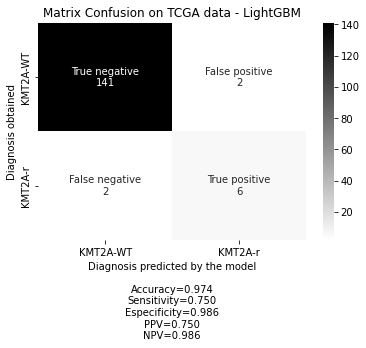

In [32]:
predictions = gbm.predict(Xtcga)
cm = confusion_matrix(ytcga, predictions, labels = [0, 1])
labels = ['True negative','False positive','False negative', 'True positive']
diagnosticos = ['KMT2A-WT', 'KMT2A-r']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=diagnosticos, 
                       percent=False,
                          cbar=True, cmap="binary", title="Matrix Confusion on TCGA data - LightGBM")
plt.savefig("cm_gbmTCGA.svg", format="svg", dpi=199, bbox_inches="tight")